In [34]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

np.random.seed(10)

data_size = 1000
# cada sensor vai ter 1000 dados de exemplo 
sensor1 = np.random.rand(data_size)
sensor2 = np.random.rand(data_size)
# np.random.rand() -> array de tamanho data_size (1000) e gera valores entre 0 e 1 

labels = ((sensor1 < 0.4) & (sensor2 < 0.5)).astype(int)
# pega os elementos de mesmo índice de sensor1 e sensor2, compara se ambos são menores que 0.4 e 0.5 respectivamente, retornando um true ou false
# que depois é convertido para 0 (false) e 1 (true) com o astype(int)
labels

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7751 - loss: 0.5309 - val_accuracy: 0.7950 - val_loss: 0.5038
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7968 - loss: 0.4961 - val_accuracy: 0.7950 - val_loss: 0.4891
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7897 - loss: 0.4891 - val_accuracy: 0.7950 - val_loss: 0.4804
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8076 - loss: 0.4657 - val_accuracy: 0.7950 - val_loss: 0.4738
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7940 - loss: 0.4722 - val_accuracy: 0.7950 - val_loss: 0.4696
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7941 - loss: 0.4682 - val_accuracy: 0.7950 - val_loss: 0.4665
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.4663 - val_accuracy: 0.7950 - val_loss: 0.4635
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7991 - loss: 0.4585 - val_accuracy: 0.7950 - v

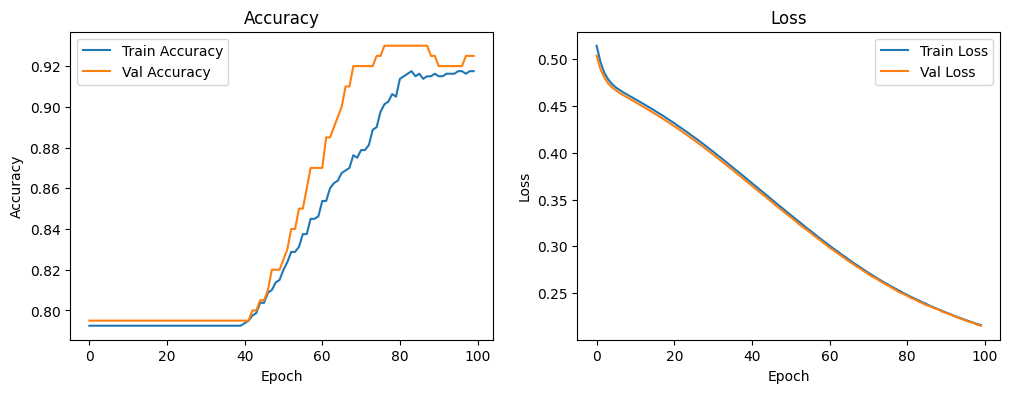

Test Accuracy: 0.93


In [35]:
X = np.column_stack((sensor1, sensor2))
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=10, 
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping]
)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.2f}")

In [36]:
weights_input_hidden = model.layers[0].get_weights()[0]
biases_hidden = model.layers[0].get_weights()[1]

weights_hidden_output = model.layers[1].get_weights()[0]
bias_output = model.layers[1].get_weights()[1][0]

print("=== Copie este trecho para o Arduino IDE === \n")

print("float weights_input_hidden[2][4] = {")
for i in range(2):
    print("  {", end='')
    print(", ".join(f"{weights_input_hidden[i][j]:.6f}" for j in range(4)), end='')
    print("},")
print("};\n")

print("float biases_hidden[4] = {", end='')
print(", ".join(f"{biases_hidden[j]:.6f}" for j in range(4)), end='')
print("};\n")

print("float weights_hidden_output[4] = {", end='')
print(", ".join(f"{weights_hidden_output[j][0]:.6f}" for j in range(4)), end='')
print("};\n")

print(f"float bias_output = {bias_output:.6f};")

=== Copie este trecho para o Arduino IDE === 

float weights_input_hidden[2][4] = {
  {2.553731, 2.511473, -3.037092, 2.980642},
  {2.632648, 2.033077, -1.946255, 2.346183},
};

float biases_hidden[4] = {-1.685257, -1.390632, 1.579151, -1.718318};

float weights_hidden_output[4] = {-2.049522, -0.934115, 3.283430, -2.530071};

float bias_output = 0.554401;
